In [29]:

from IPython.display import Image as ImageDisplay

from markovchain import MarkovChain

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

BASELINE MATRIX 
         Seongsu  Onsu  Yaksu   Isu
Seongsu     0.00  0.16   0.71  0.13
Onsu        0.36  0.00   0.37  0.27
Yaksu       0.00  0.41   0.00  0.59
Isu         0.74  0.07   0.19  0.00
./markov_chain_base__None.jpeg


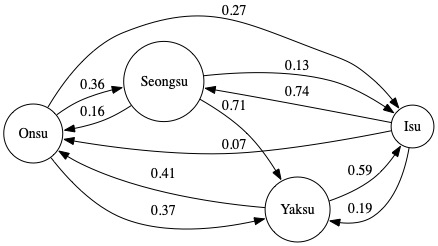

In [30]:
mc = MarkovChain(region_list=['Seongsu', 'Onsu', 'Yaksu', 'Isu'],
                 remove_self_flight=True)

base_img = mc.plot_base()
print(base_img)
ImageDisplay(base_img)


 BLOCKED MATRIX BETWEEN Seongsu AND Yaksu
         Seongsu  Onsu  Yaksu   Isu
Seongsu     0.00  0.45   0.00  0.55
Onsu        0.13  0.00   0.44  0.43
Yaksu       0.00  0.39   0.00  0.61
Isu         0.09  0.28   0.63  0.00


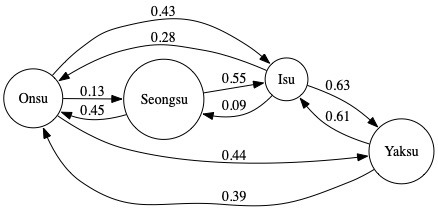

In [31]:
start = 'Seongsu'
end = 'Yaksu'
blocked_img = mc.plot_blocked_node(node_1=start,
                                   node_2=end)
ImageDisplay(blocked_img)

Step: 6
Route:  ['Seongsu', 'Isu', 'Onsu', 'Isu', 'Onsu', 'Isu', 'Yaksu']


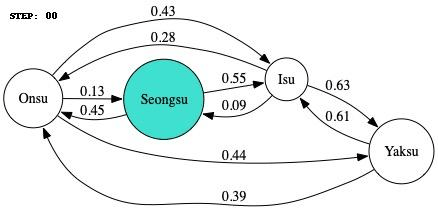

In [32]:
init_region = start
dest_region = end
plot_mode = 'blocked'
travel_simulated = mc.travel_simulation(init_region,
                                        dest_region,
                                        plot_mode
                                        )
print(f'Step: {len(travel_simulated)-1}')
print('Route: ',travel_simulated)

travel_img = mc.plot_travel_simulation(plot_mode)
ImageDisplay(travel_img)

# Calculate n-step probability matrix

The UAV is starting the trip from Wangsimni.

What is the probability of ending in Gunja is two trips from now?

In [33]:
mc.prob_ending_region_after_n_step(matrix_df=mc.blocked_df,
                                    init_region=start,
                                    final_region=end,
                                    n_step=2)

0.5445000000000001

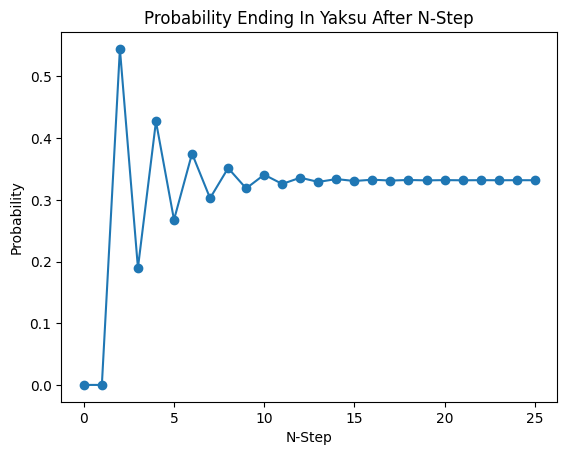

<Figure size 640x480 with 0 Axes>

In [34]:
init_region= start
final_region= end
matrix_df= mc.blocked_df
n_step=25
mc.plot_prob_ending(init_region, final_region, matrix_df, n_step)

# Example

In [35]:
def matrix_power(matrix, power):
  if power == 0:
    return np.identity(len(matrix))
  elif power == 1:
    return matrix
  else:
    return np.dot(matrix, matrix_power(matrix, power-1))

mc_example = {'Seongsu': [0,0,.07,0.93],
              'Onsu': [0,0,0.86,0.14],
              'Yaksu': [.28,.52,0,0.2],
              'Isu': [.16,.41,0.43,0]}

mc = pd.DataFrame(data = mc_example, index = ['Seongsu', 'Onsu', 'Yaksu', 'Isu'])
matrix_power(mc.to_numpy(), 2)

array([[0.1684, 0.2632, 0.032 , 0.1204],
       [0.4177, 0.5046, 0.082 , 0.2236],
       [0.3999, 0.0602, 0.5528, 0.3638],
       [0.014 , 0.172 , 0.3332, 0.2922]])

In [36]:
initial_dist = np.asarray([1,0,0,0])

mc_p2 = matrix_power(mc.to_numpy(),2)

np.dot(initial_dist,mc_p2)

array([0.1684, 0.2632, 0.032 , 0.1204])